<a href="https://colab.research.google.com/github/finesaaa/clustering-assignment/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np 
import pandas as pd
import missingno

In [52]:
data_raw = pd.read_csv("travel insurance.csv")
data_raw.head() 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [53]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


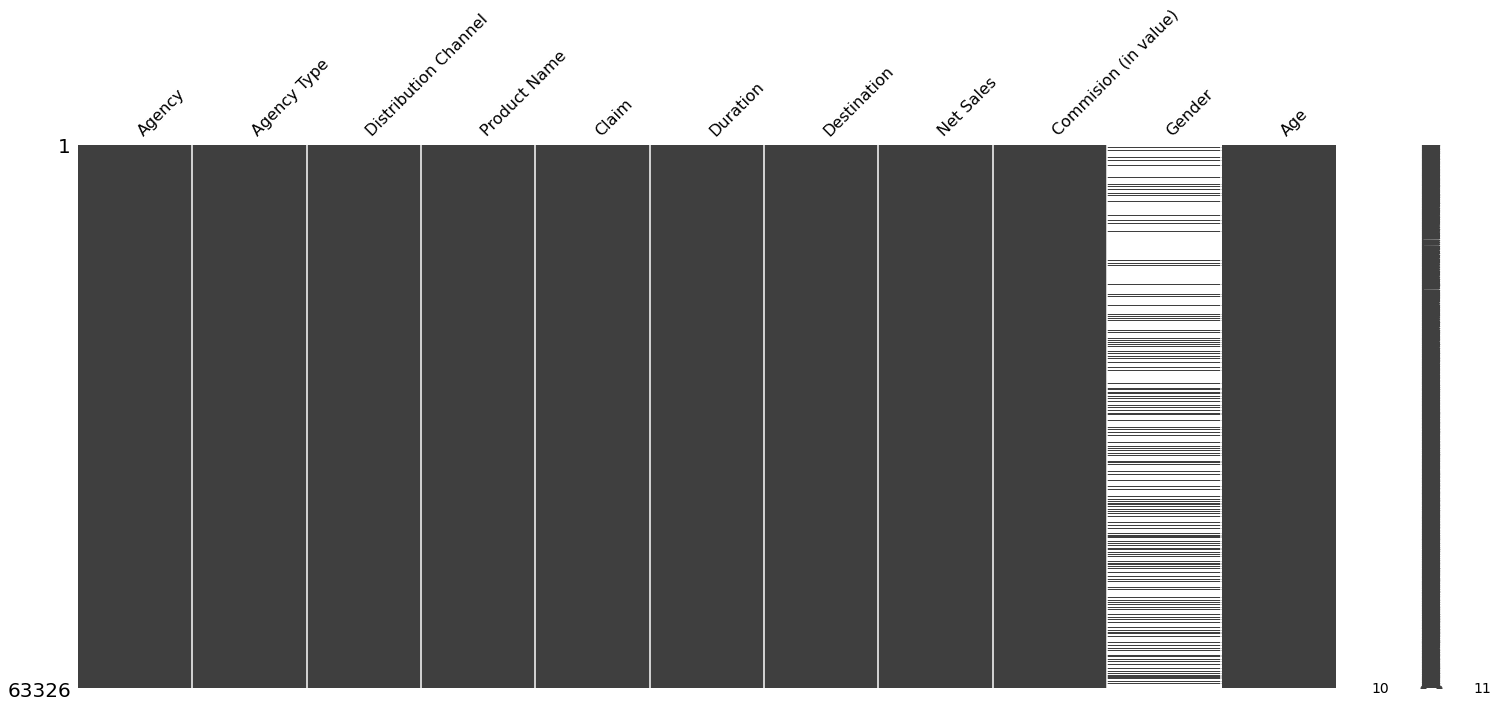

In [54]:
missingno.matrix(data_raw)

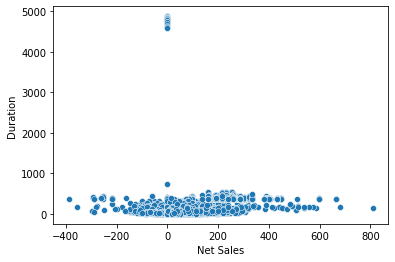

In [55]:
import seaborn as sns
sns.scatterplot(x='Net Sales', y='Duration', data=data_raw)
# sns.countplot(x='Agency', data=data_raw)
# sns.countplot(x='Product Name', data=data_raw)

In [56]:
data_set = data_raw[['Net Sales',  'Duration']]
data_set = pd.DataFrame(data_set, columns=['Net Sales',  'Duration'])
data_set

,Net Sales,Duration
0,-29.0,186
1,-29.0,186
2,-49.5,65
3,-39.6,60
4,-19.8,79
...,...,...
63321,35.0,111
63322,40.0,58
63323,18.0,2
63324,18.0,3


In [57]:
from scipy import stats
z_scores = stats.zscore(data_set)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_norm = data_set[filtered_entries]

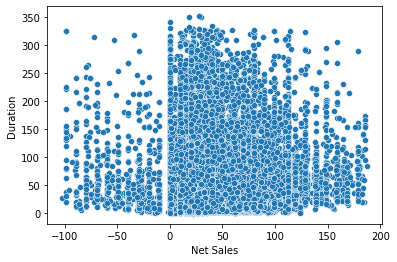

In [58]:
sns.scatterplot(x='Net Sales', y='Duration', data=data_norm)

In [59]:
data_norm.describe()

,Net Sales,Duration
count,61071.000000,61071.000000
mean,34.117161,37.513992
std,28.529337,45.083500
min,-102.000000,-2.000000
25%,18.000000,9.000000
50%,26.000000,21.000000
75%,44.000000,48.000000
max,187.000000,352.000000


In [60]:
import numpy as np
from sklearn.preprocessing import StandardScaler
data_norm = np.nan_to_num(data_norm)
data_ss = StandardScaler().fit_transform(data_norm)
data_ss

array([[-2.21237804,  3.29360463],
       [-2.21237804,  3.29360463],
       [-2.93094251,  0.6096739 ],
       ...,
       [-0.56493753, -0.78774458],
       [-0.56493753, -0.76556334],
       [-0.28452212, -0.34411967]])

## Elbow Method

In [42]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans 
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
 
for k in K:
    # Building and fitting the model
    kmeans_model = KMeans(init = "k-means++", n_clusters = k, n_init=12).fit(data_ss)
    kmeans_model.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeans_model.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans_model.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeans_model.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans_model.inertia_

In [43]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 41.211829481815606
2 : 30.978370130906693
3 : 25.462639668672413
4 : 21.419059453515445
5 : 19.328667143049472
6 : 17.838158229306952
7 : 16.737158752975184
8 : 15.493376052282729
9 : 14.648618962323324
10 : 14.05418460200439
11 : 13.765055431251188
12 : 13.126941917288988
13 : 12.7142096004186
14 : 12.407054364640606


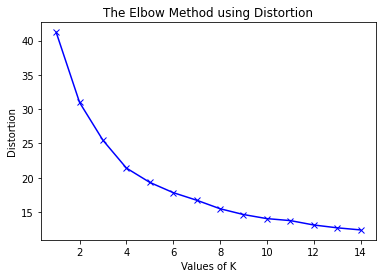

In [44]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

## KMeans 3 Clustering

In [45]:
cluster_num = 3
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init = 12)
k_means.fit(data_ss)
labels = k_means.labels_
print(labels)

[0 0 1 ... 1 1 1]


In [46]:
df = pd.DataFrame(data_norm, columns=['Net Sales',  'Duration'])
df["Clustering"] = labels
df

,Net Sales,Duration,Clustering
0,-29.0,186.0,0
1,-29.0,186.0,0
2,-49.5,65.0,1
3,-39.6,60.0,1
4,-19.8,79.0,1
...,...,...,...
61066,35.0,111.0,0
61067,40.0,58.0,1
61068,18.0,2.0,1
61069,18.0,3.0,1


In [47]:
df_centroid = df
df_centroid.groupby("Clustering").mean()

,Net Sales,Duration
Clustering,,
0,32.659200,145.579037
1,22.786149,22.476536
2,82.152409,40.725349


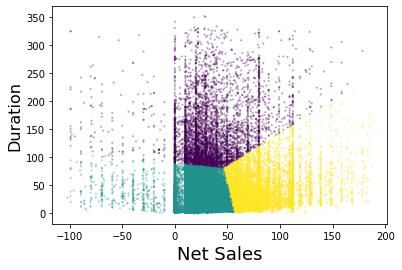

In [48]:
import matplotlib.pyplot as plt 
X = data_norm
area = 1.6
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.25)
plt.xlabel('Net Sales', fontsize=18)
plt.ylabel('Duration', fontsize=16)

plt.show()

## KMeans 6 Clustering

In [49]:
cluster_num = 6
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init=12)
k_means.fit(data_ss)
labels_6 = k_means.labels_
print(labels_6)

[3 3 0 ... 0 0 1]


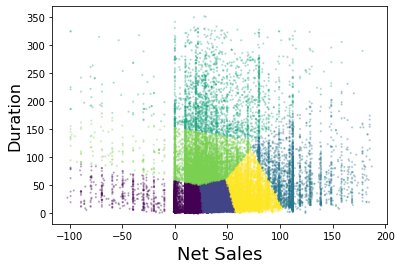

In [50]:
import matplotlib.pyplot as plt 
X = data_norm
area = 1.6
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels_6.astype(np.float), alpha=0.25)
plt.xlabel('Net Sales', fontsize=18)
plt.ylabel('Duration', fontsize=16)

plt.show()